In [ ]:
# Rachel Singleton
# Math 472
# Homework 2

# (1) Write a python script that implements the Newton's method in Example 2.2 on page 27 and produces 
# Figure 2.3 of the Computation Statistics book. 
# (2) Problem 2.2 on page 54 of the Computation Statistics book. 

In [ ]:
# Suppose g'(x) is is continuously differentiable and g''(x*) != 0
# "At iteration t, the approach approximates g′(x∗) by the linear Taylor series expansion:
    # 0 = g'(x*) ~ g'(x^t)+(x*-x^t)g''(x^t)
# Root of g' is the root of the tangent line
# 2.9 gives equation for root x* which depends on x^t
# updating equation is x^t+1 = x^t + h^t
# h^t = -g'(x^t)/g''(x^t)

Number of iterations:  4
Final Solution:  3.5911214580612825


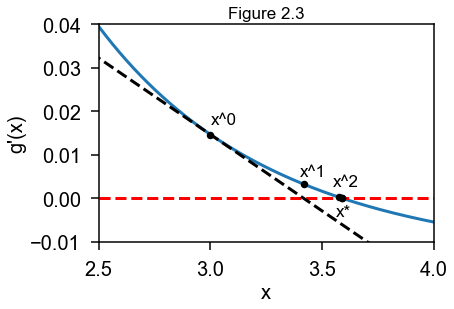

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as lns
%matplotlib inline

# The function we are trying to maximize
def function_g(x):
    return (np.log(x))/(1+x)
    
# The derivative of the function we are trying to maximize
def derivative_g(x):
    return (1+(1/x)-(np.log(x)))/((1+x)**2)

def function_h(x):
    return ((x+1)*(1+(1/x)-np.log(x)))/(3+(4/x)+((1/x)**2)-(2*np.log(x)))

def derivative2_g(x):
    return (((-1/x**2)-(1/x))*((1+x)**2)-(1+(1/x)-np.log(x))*(2+2*x))/((1+x)**2)**2

def tangent_line(x):
    slope = derivative2_g(3)
    b = derivative_g(3)-(slope*3)
    return slope*x + b

def newton_method(x):
    x_values = [x]
    num_iterations = 0
    max_iterations = 20
    tolerance = 0.000001 # 1*10^-6
    
    while((num_iterations < max_iterations) and (abs(derivative_g(x)) > tolerance)):
        x = x + function_h(x)
        x_values.append(x)
        num_iterations+=1
    
    # Printing results
    if(num_iterations == max_iterations):
        print("You reached the maximum number of iterations.")
    else:
        print("Number of iterations: ",num_iterations)
    print("Final Solution: ", x_values[num_iterations])

    # Now we graph!

    # Plot figure 2.3
    plt.figure(1)
    x_axis_vals = np.linspace(2, 4, 1000)
    plt.plot(x_axis_vals,derivative_g(x_axis_vals))
    plt.axhline(0, color = 'r', ls='--')
    
    i = 0
    while(i < len(x_values)):
        plt.plot(x_values[i], derivative_g(x_values[i]), 'ko')
        i+=1

    plt.plot(x_axis_vals,tangent_line(x_axis_vals), color = 'k', ls='--')
    plt.axis([2.5, 4, -0.01, 0.04])
    plt.xlabel('x',fontsize=20)
    plt.ylabel('g\'(x)',fontsize=20)
    plt.title('Figure 2.3',fontsize=17)
    plt.annotate('x*',xy=(3.56,-0.004),fontsize=17)
    plt.annotate('x^0',xy=(3,0.017),fontsize=17)
    plt.annotate('x^1',xy=(3.4,0.005),fontsize=17)
    plt.annotate('x^2',xy=(3.55,0.0028),fontsize=17)

    plt.show()
    
newton_method(3)

In [ ]:
#Question 2: Problem 2.2
#Consider the density f(x) = [1 − cos{x − θ}]/2π on 0 ≤ x ≤ 2π, where θ is a param- eter between −π and π. 
#The following i.i.d. data arise from this density: 3.91, 4.85, 2.28, 4.06, 3.70, 4.04, 5.46, 3.53, 2.28, 1.96, 
#2.53, 3.88, 2.22, 3.47, 4.82, 2.46, 2.99, 2.54, 0.52, 2.50. We wish to estimate θ.
#a. Graph the log likelihood function between −π and π.
#b. Find the method-of-moments estimator of θ.
#c. Find the MLE for θ using the Newton–Raphson method, using the result from (b) as the starting value. 
# What solutions do you find when you start at −2.7 and 2.7?
#d. Repeat part(c) using 200 equally spaced starting values between −π and π. Partition the interval between −π and π 
#into sets of attraction. In other words, divide the set of starting values into separate groups, with each group 
#corresponding to a separate unique outcome of the optimization (a local mode). Discuss your results.
#e. Find two starting values,as nearly equal as you can,for which the Newton–Raphson method converges to two different 
#solutions.

Text(0.5,1,'Graph of log-liklihood function')

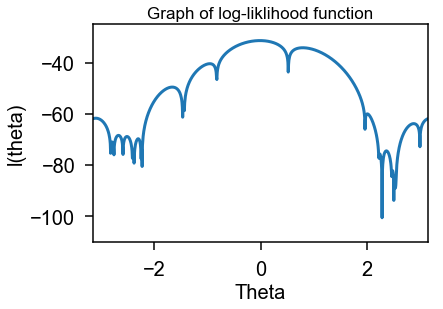

In [41]:
data = np.asarray([3.91,4.85,2.28,4.06,3.70,4.04,5.46,3.53,2.28,1.96,2.53,3.88,2.22,3.47,4.82,2.46,2.99,2.54,0.52,2.5])
def log_liklihood(x,theta):
    n = x.size
    total = []
    for i in range(n):
        total.append(np.log(1-np.cos(x[i]-theta)))
    
    total = np.asarray(total)
    total=total.sum(axis=0)
    return total-n*np.log(2*np.pi)

theta_vals = np.linspace(-np.pi, np.pi, 1000)
plt.plot(theta_vals,log_liklihood(data,theta_vals))
plt.axis([-np.pi, np.pi, -110, -25])
plt.xlabel('Theta',fontsize=20)
plt.ylabel('l(theta)',fontsize=20)
plt.title('Graph of log-liklihood function',fontsize=17)